# Question 1

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
# Select an arbitrary large number N. Generate N samples of a uniform random
# variable between (−1, 1). Also, generate N samples of a Gaussian random
# variable with mean 0.1 and variance 0.3. Add the two generated data sets and
# the resulting N sample points will be your data.

N = 10_000

# N samples of uniform(-1,1)
uniform = np.random.uniform(-1, 1, N)

# N samples of Gaussian(0.1, 0.3)
gaussian = np.random.normal(0.1, 0.3**0.5, N)

# uniform + gaussian
data = uniform + gaussian

In [4]:
# test null hypothesis is that mean is 0
mean = 0
data_mean = np.mean(data)
std = np.std(data)

alpha = 0.05
z = 1.96
lower = mean - z * std / np.sqrt(N)
upper = mean + z * std / np.sqrt(N)

print(f"95% confidence interval of mean: ({lower}, {upper})")
print(f"Sample mean: {data_mean}")

if lower <= mean <= upper:
  print("Null hypothesis is rejected")
else:
  print("Null hypothesis is not rejected")

95% confidence interval of mean: (-0.015477834135532205, 0.015477834135532205)
Sample mean: 0.0950864443846938
Null hypothesis is rejected


# Question 2

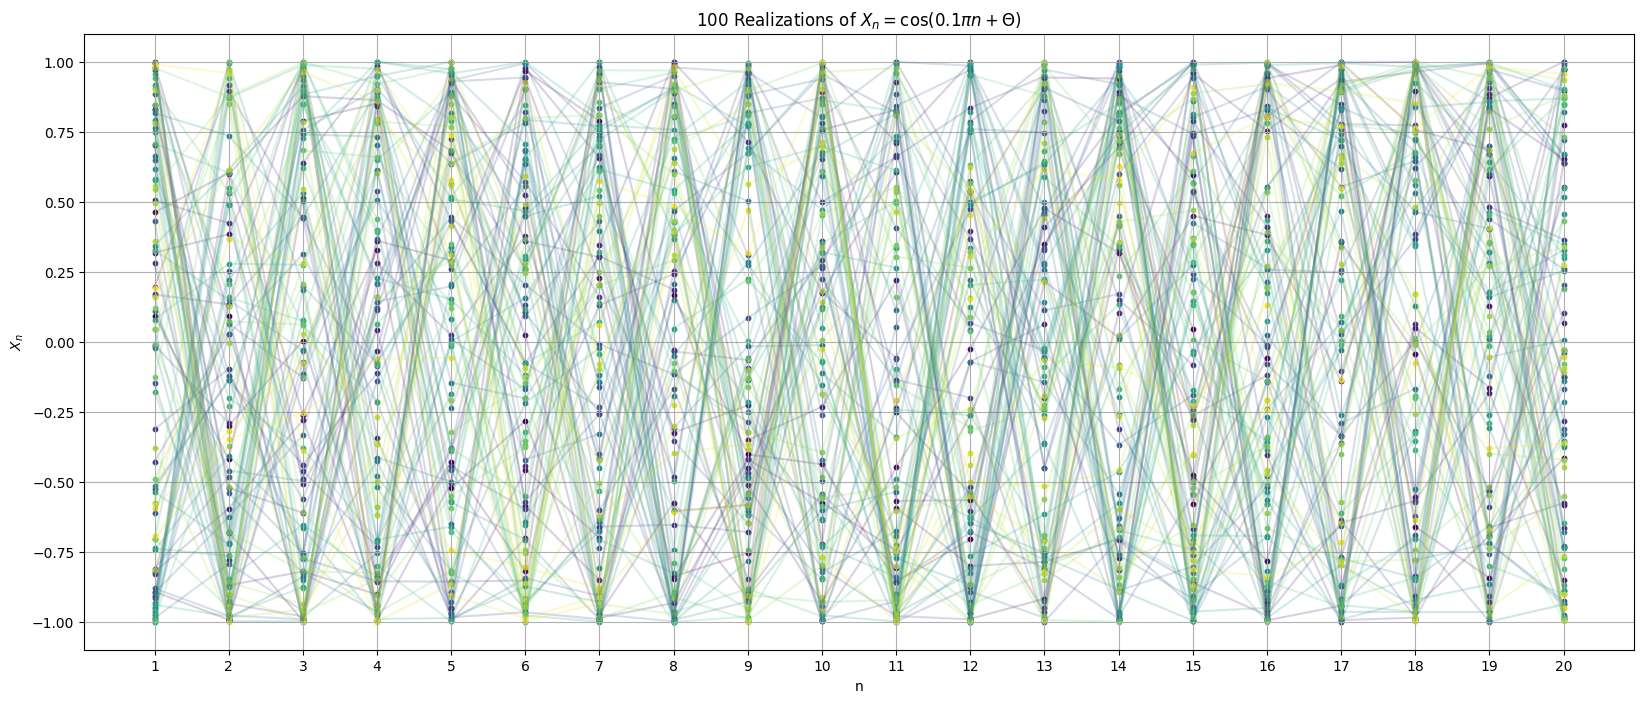

In [5]:
size = 20
num_realizations = 100
n_values = np.arange(1, size+1)

# Plot each realization
plt.figure(figsize=(20, 8))
for i in range(num_realizations):

    theta = np.random.uniform(-np.pi, np.pi, size)
    X_n = np.cos(0.1*np.pi*np.arange(size) + theta)

    # different color for each X_n
    cmap = plt.get_cmap('viridis')
    color = cmap(i / num_realizations)
    plt.plot(n_values, X_n, color=color, alpha=0.2)
    # mark (n, X_n)
    plt.scatter(n_values, X_n, color=color, alpha=1, s=10)


# make sure n ticks are 1 apart
plt.xlabel('n')
plt.ylabel('$X_n$')
plt.title('100 Realizations of $X_n = \cos(0.1\pi n + \Theta)$')
plt.xticks(range(1, size+1))
plt.grid(True)
plt.show()

# Question 3

In [6]:
# autoregressive random process
# Y_n = a * Y_{n-1} + X_n
# X_n is white Gaussian noise

def autoregressive_process(a, size):

  X_n = np.random.normal(0, (1-a**2)**0.5, size)

  Y_n = np.zeros(size)
  for i in range(1, size):
      Y_n[i] = a * Y_n[i-1] + X_n[i]

  return Y_n

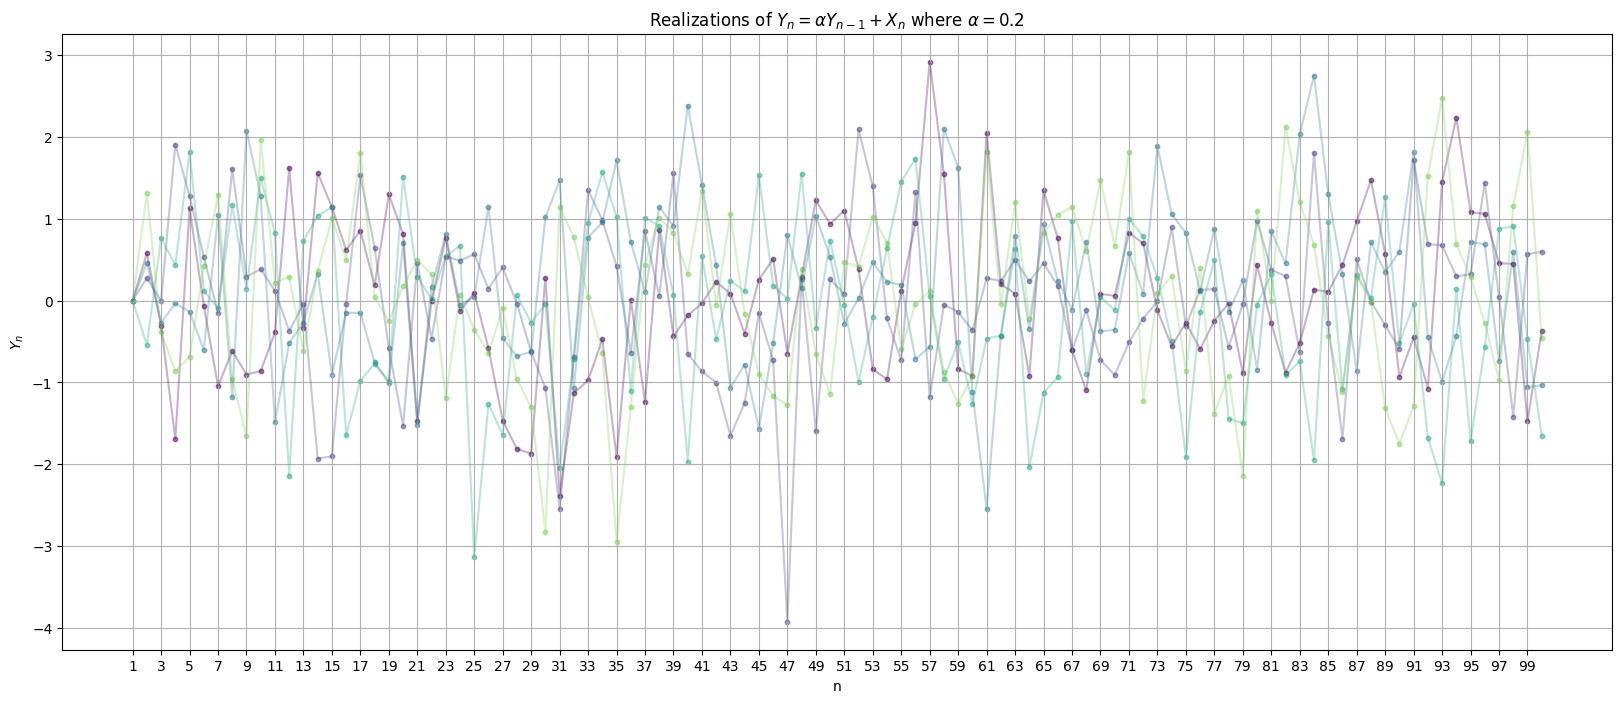

In [7]:
size = 100
num_realizations = 5
n_values = np.arange(1, size+1)



### a = 0.2
a = 0.2

# Plot each realization
plt.figure(figsize=(20, 8))
for i in range(num_realizations):

    Y_n = autoregressive_process(a, size)

    # different color for each X_n
    cmap = plt.get_cmap('viridis')
    color = cmap(i / num_realizations)
    plt.plot(n_values, Y_n, color=color, alpha=0.3)
    # mark (n, X_n)
    plt.scatter(n_values, Y_n, color=color, alpha=0.5, s=10)


# make sure n ticks are 1 apart
plt.xlabel('n')
plt.ylabel('$Y_n$')
plt.title(f'Realizations of $Y_n = α Y_{{n-1}} + X_n$ where $α={a}$')
plt.xticks(range(1, size+1, 2))
plt.grid(True)
plt.show()

size = 50
num_realizations = 5
n_values = np.arange(1, size+1)


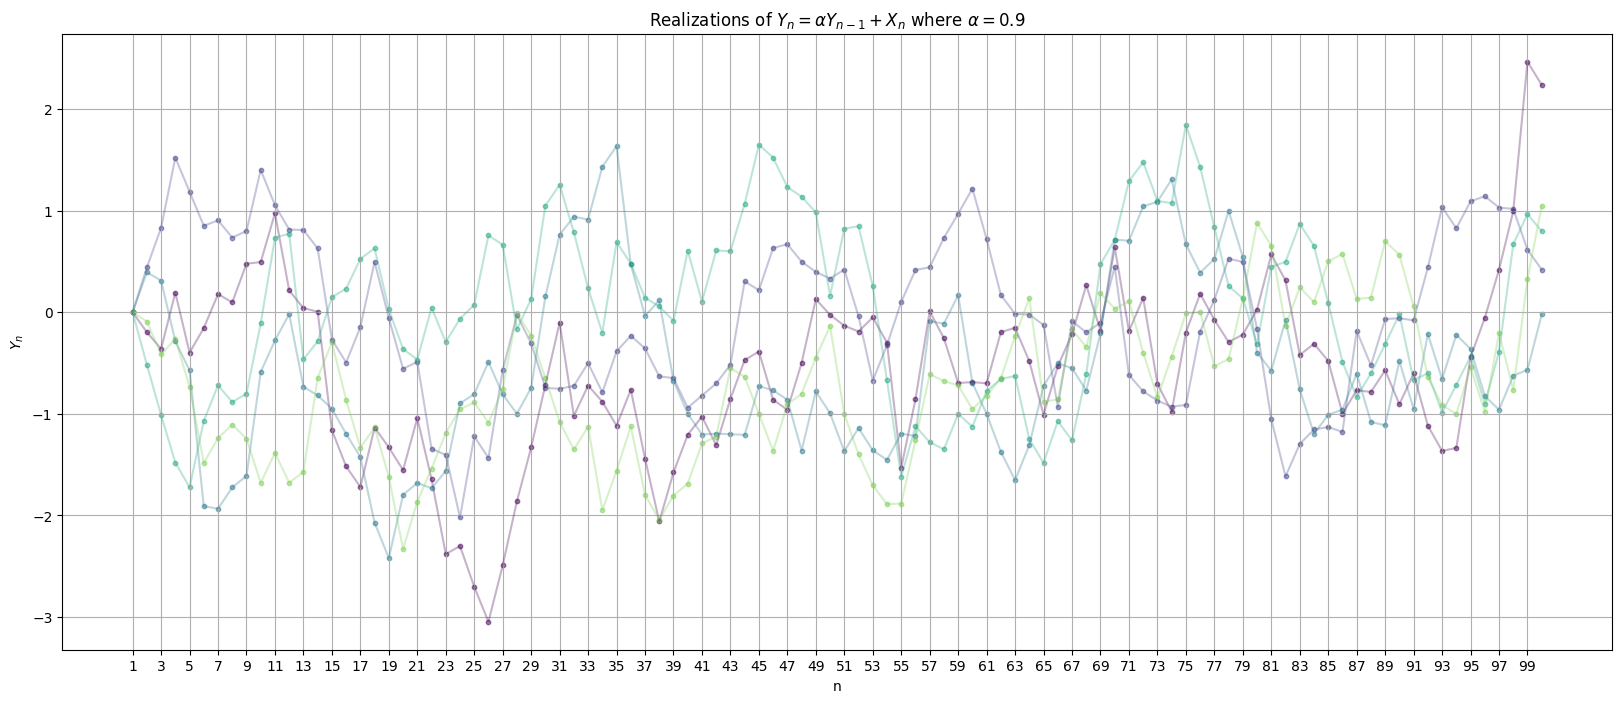

In [8]:
### a = 0.9
size = 100
num_realizations = 5
n_values = np.arange(1, size+1)

a = 0.9

# Plot each realization
plt.figure(figsize=(20, 8))
for i in range(num_realizations):

    Y_n = autoregressive_process(a, size)

    # different color for each X_n
    cmap = plt.get_cmap('viridis')
    color = cmap(i / num_realizations)
    plt.plot(n_values, Y_n, color=color, alpha=0.3)
    # mark (n, X_n)
    plt.scatter(n_values, Y_n, color=color, alpha=0.5, s=10)


# make sure n ticks are 1 apart
plt.xlabel('n')
plt.ylabel('$Y_n$')
plt.title(f'Realizations of $Y_n = α Y_{{n-1}} + X_n$ where $α={a}$')
plt.xticks(range(1, size+1, 2))
plt.grid(True)
plt.show()

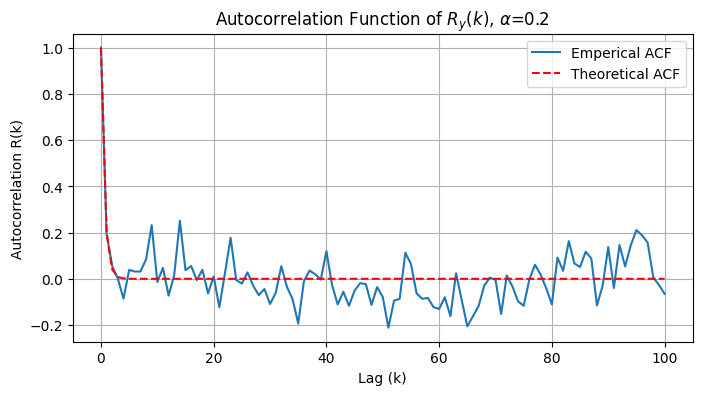

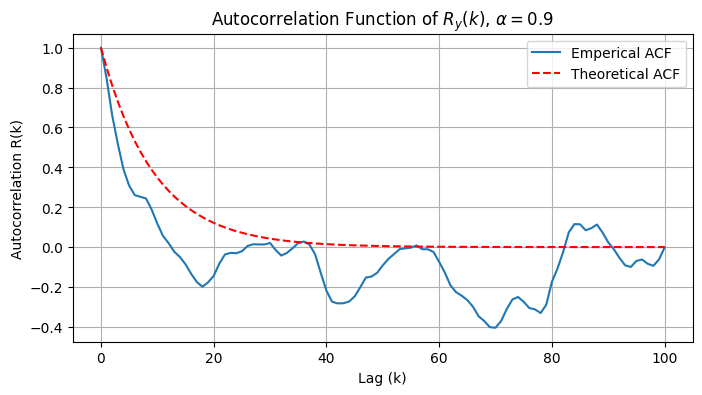

In [9]:
# plot autocorrelation Y_n with Y_{n+k}

### a = 0.2

size = 200
a = 0.2

Y_n = autoregressive_process(a, size)

def autocorrelation(Y, k):
    N = len(Y)
    Y_mean = np.mean(Y)
    C_k = np.sum((Y[:N-k] - Y_mean) * (Y[k:] - Y_mean)) / (N-k)
    C_0 = np.sum((Y - Y_mean) ** 2) / N
    return C_k / C_0

# Compute autocorrelation for k values
max_k = size // 2  # Maximum lag to compute
R_values_0_2 = [autocorrelation(Y_n, k) for k in range(max_k + 1)]
R_theoretical_0_2 = [0.2**k for k in range(max_k + 1)]

# Plot the autocorrelation function
plt.figure(figsize=(8, 4))
plt.plot(R_values_0_2, label="Emperical ACF")
plt.plot(R_theoretical_0_2, linestyle="dashed", label="Theoretical ACF", color="red")
plt.xlabel("Lag (k)")
plt.ylabel("Autocorrelation R(k)")
plt.title(f"Autocorrelation Function of $R_y(k)$, $α$={a}")
plt.legend()
plt.grid()
plt.show()



### a = 0.9 Autocorrelation

size = 200
a = 0.9

Y_n = autoregressive_process(a, size)

# Compute autocorrelation for k values
max_k = size // 2  # Maximum lag to compute
R_values_0_9 = [autocorrelation(Y_n, k) for k in range(max_k + 1)]
R_theoretical_0_9 = [0.9**k for k in range(max_k + 1)]

# Plot the autocorrelation function
plt.figure(figsize=(8, 4))
plt.plot(R_values_0_9, label="Emperical ACF")
plt.plot(R_theoretical_0_9, linestyle="dashed", label="Theoretical ACF", color="red")
plt.xlabel("Lag (k)")
plt.ylabel("Autocorrelation R(k)")
plt.title(f"Autocorrelation Function of $R_y(k)$, $α={a}$")
plt.legend()
plt.grid()
plt.show()

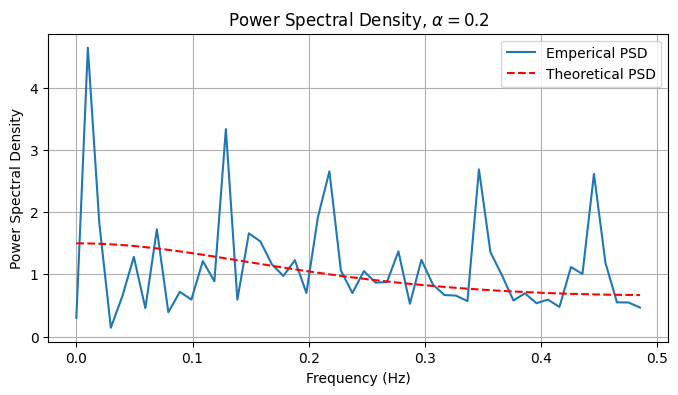

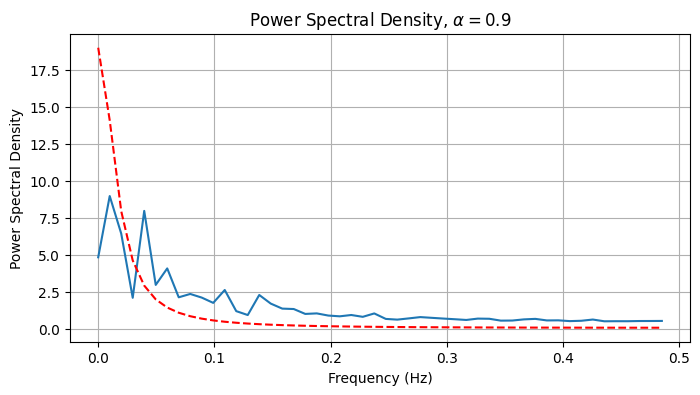

In [10]:
### alpha=0.2

# Compute Power Spectral Density using FFT of Autocorrelation
PSD = np.abs(np.fft.fft(R_values_0_2))  # Mag of FFT
freqs = np.fft.fftfreq(len(R_values_0_2), d=1)  # Corresponding frequencies

# single-sided fft
positive_freqs = freqs[:len(freqs)//2]
PSD = PSD[:len(PSD)//2]

# theoretical PSD
def theoretical_psd(alpha, freqs):
    return (1-alpha**2) / (1 - 2 * alpha * np.cos(2 * np.pi * freqs) + alpha**2)

# Plot the Power Spectral Density
plt.figure(figsize=(8, 4))
plt.plot(positive_freqs, PSD, label="Emperical PSD")
plt.plot(positive_freqs, theoretical_psd(0.2, positive_freqs), linestyle="dashed", label="Theoretical PSD", color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density, $α=0.2$")
plt.legend()
plt.grid()
plt.show()

### alpha=0.9

# Compute Power Spectral Density using FFT of Autocorrelation
PSD = np.abs(np.fft.fft(R_values_0_9))  # Mag of FFT
freqs = np.fft.fftfreq(len(R_values_0_9), d=1)  # Corresponding frequencies

# single-sided fft
positive_freqs = freqs[:len(freqs)//2]
PSD = PSD[:len(PSD)//2]

# Plot the Power Spectral Density
plt.figure(figsize=(8, 4))
plt.plot(positive_freqs, PSD, label="Emperical PSD")
plt.plot(positive_freqs, theoretical_psd(0.9, positive_freqs), linestyle="dashed", label="Theoretical PSD", color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density, $α=0.9$")
plt.grid()
plt.show()